# Exploratory Data Analysis (EDA)

## 1. Introduction

### Project 

The Data Science field has expanded significantly in recent years, leading to changes in wages and working conditions. It is important to understand how data science salaries correlate with various socio-economic indicators internationally. This research will help identify the relationship between professionals' income levels, countries' economic conditions and the quality of life of the population and help professionals and organizations make informed career and salary decisions.


### Dataset Description:
The Dataset provides valuable insights into the compensation trends and variations in the field of data science from 2020 to 2024, and a wealth of information about all countries worldwide, covering a wide range of indicators and attributes. It encompasses demographic statistics, economic indicators, environmental factors, healthcare metrics, education statistics, and much more.

## 2. Import Libraries

In [211]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## 3. Data Collection

###  Sourcing and loading

Import the data into the working environment

In [216]:
salaries = pd.read_csv('/Users/juliabolgova/Documents/GitHub/CapstoneProject/data/interim/salaries.csv')

In [218]:
salaries.head()

,Unnamed: 0,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891
1,1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891
2,2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891
3,3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891
4,4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891


In [220]:
# Reset the index without adding it as a new column
salaries = salaries.reset_index(drop=True) 

In [222]:
# Drop column 'Unnamed: 0' 
if 'Unnamed: 0' in salaries.columns:
    salaries = salaries.drop(columns=['Unnamed: 0'])
salaries.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891


In [224]:
# Examine the data types of our dataset
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5702 entries, 0 to 5701
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Job Title                                  5702 non-null   object 
 1   Employment Type                            5702 non-null   object 
 2   Experience Level                           5702 non-null   object 
 3   Expertise Level                            5702 non-null   object 
 4   Salary                                     5702 non-null   int64  
 5   Salary Currency                            5702 non-null   object 
 6   Company Location                           5702 non-null   object 
 7   Salary in USD                              5702 non-null   int64  
 8   Employee Residence                         5702 non-null   object 
 9   Company Size                               5702 non-null   object 
 10  Year                    

## 4. Data Cleaning

My opinion is that some columns are not necessary for our analysis

In [228]:
# Exclude some columns from data 

salaries = salaries.drop(["Salary", "Longitude", "Latitude", "Out of pocket health expenditure", "Physicians per thousand", \
                   "Maternal mortality ratio", "Largest city", "Infant mortality", "Gasoline Price", \
                   "Forested Area (%)", "Currency-Code", "Co2-Emissions", "Capital/Major City", "Calling Code", \
                   "Birth Rate", "Armed Forces size",  "Land Area(Km2)", "Agricultural Land( %)", "Land Area(Km2)", "Abbreviation"
                  ], axis=1)

In [230]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5702 entries, 0 to 5701
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Job Title                                  5702 non-null   object 
 1   Employment Type                            5702 non-null   object 
 2   Experience Level                           5702 non-null   object 
 3   Expertise Level                            5702 non-null   object 
 4   Salary Currency                            5702 non-null   object 
 5   Company Location                           5702 non-null   object 
 6   Salary in USD                              5702 non-null   int64  
 7   Employee Residence                         5702 non-null   object 
 8   Company Size                               5702 non-null   object 
 9   Year                                       5702 non-null   int64  
 10  Country                 

In [232]:
# Checking NaN
missing_salaries = pd.concat([salaries.isnull().sum(), 100 * salaries.isnull().mean()], axis=1)
missing_salaries.columns = ['count', '%']
missing_salaries = missing_salaries.sort_values(by='count', ascending=False)
missing_salaries

,count,%
Job Title,0,0.0
Fertility Rate,0,0.0
Unemployment rate,0,0.0
Total tax rate,0,0.0
Tax revenue (%),0,0.0
Population: Labor force participation (%),0,0.0
Population,0,0.0
Official language,0,0.0
Minimum wage,0,0.0
Life expectancy,0,0.0


In [234]:
# Checking Duplicates
duplicates_salaries = salaries.duplicated().sum()
print("\nNumber of duplicates:", duplicates_salaries)


Number of duplicates: 0


## 5. Data Exploration

### Visualizing correlations

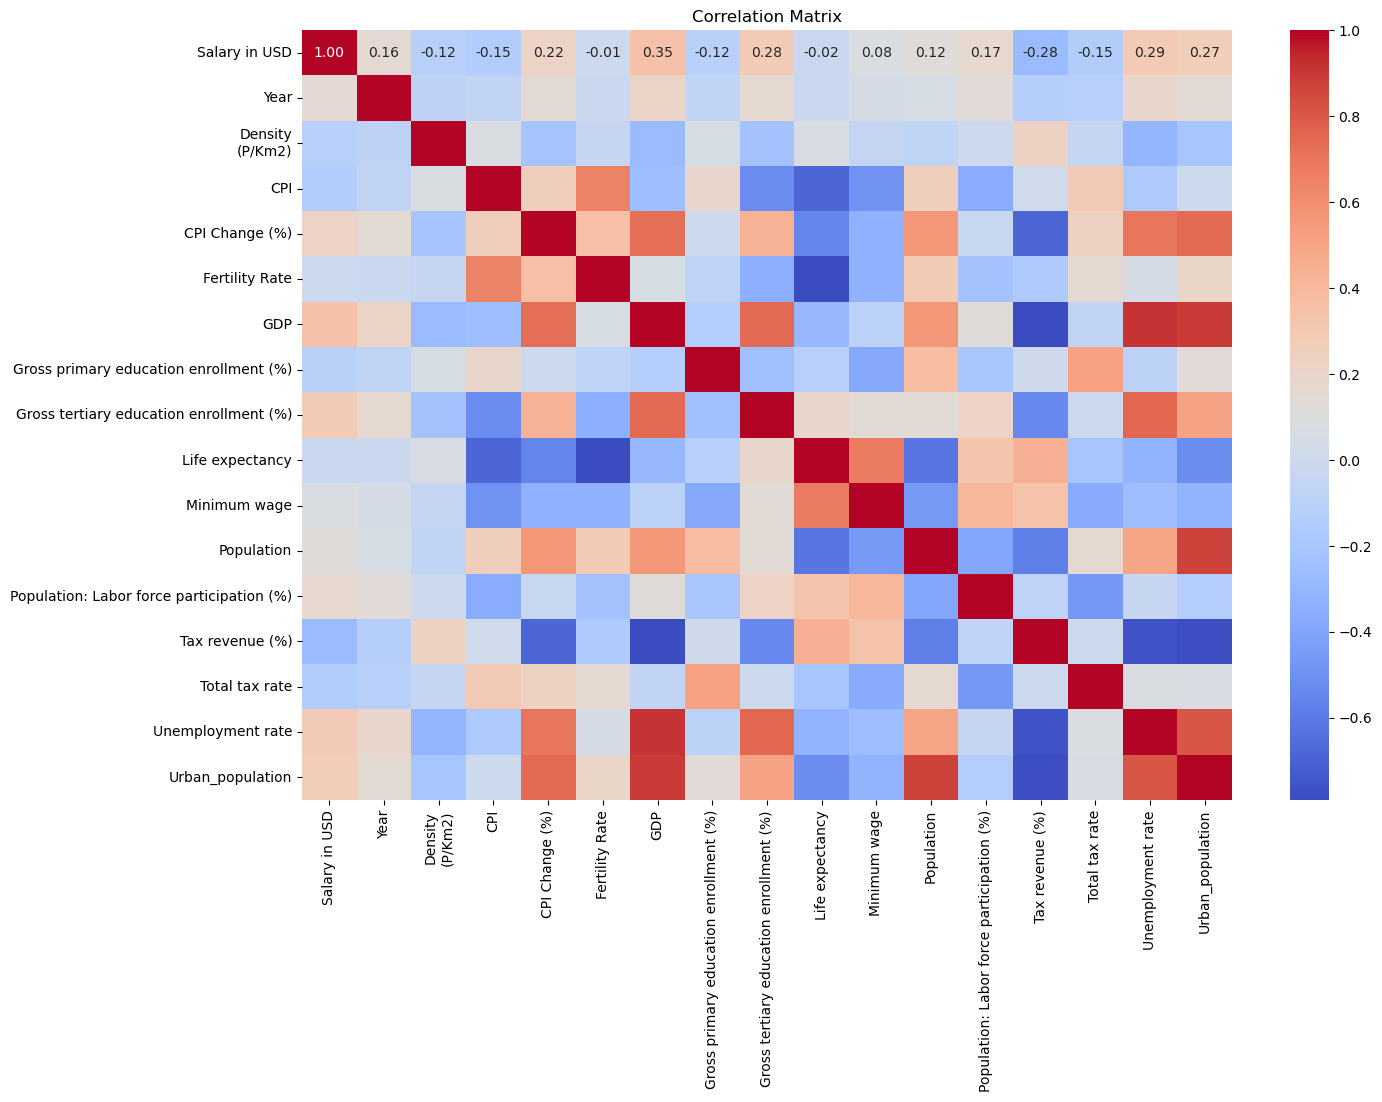

In [238]:
# Correlation
numerical_columns = salaries.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = salaries[numerical_columns].corr()

# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

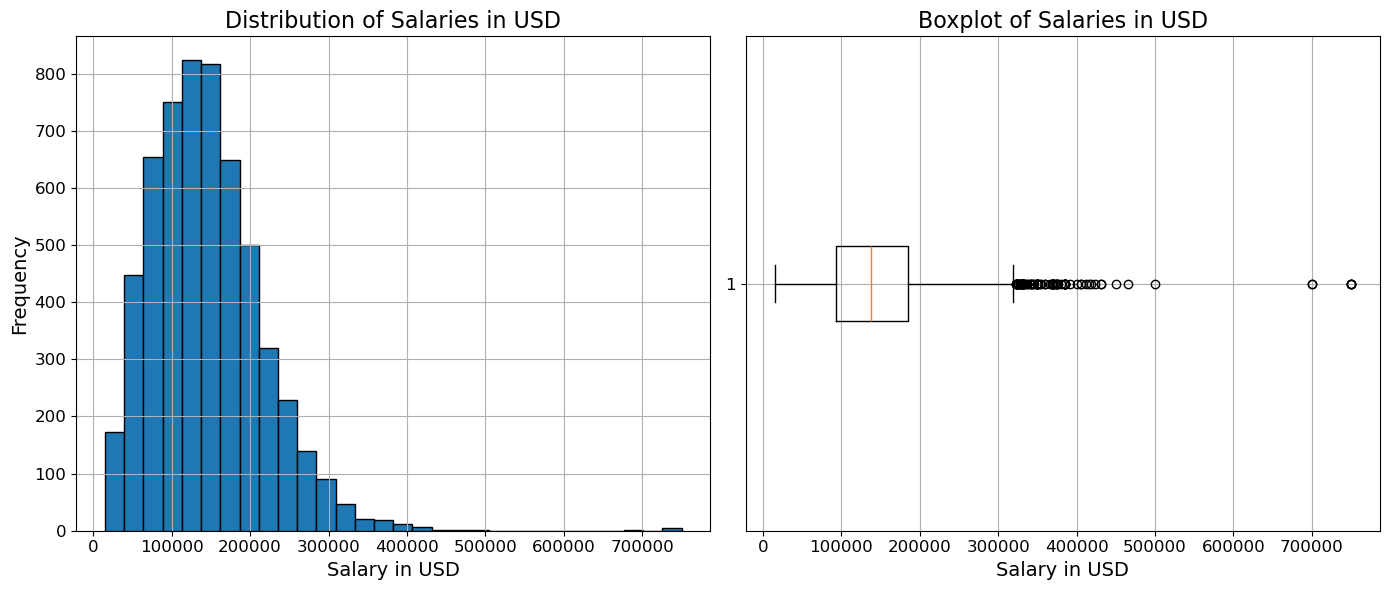

In [240]:
# Histograms and Boxplot for Salaries in USD
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram
axes[0].hist(salaries['Salary in USD'], bins=30, edgecolor='k')
axes[0].set_title('Distribution of Salaries in USD', fontsize=16)
axes[0].set_xlabel('Salary in USD', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].grid(True)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Boxplot
axes[1].boxplot(salaries['Salary in USD'], vert=False)
axes[1].set_title('Boxplot of Salaries in USD', fontsize=16)
axes[1].set_xlabel('Salary in USD', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Histogram for 'Year'
plt.hist(salaries['Year'], edgecolor='k')
plt.title('Distribution of Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.xticks([2020, 2021, 2022, 2023, 2024], fontsize=12) 
plt.yticks(fontsize=12)
plt.show()

Based on the graph, most of the data is for 2023, with data for other years included.

In [ ]:
# Histogram for 'GDP'
# Group by countries
gdp_by_country = salaries.groupby('Country')['GDP'].mean().sort_values()

# Histogram
plt.figure(figsize=(14, 8))
gdp_by_country.plot(kind='bar', edgecolor='k', color='skyblue')
plt.title('Average GDP by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average GDP', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.show()

Descriptive Statistics: Summary statistics of the dataset.
	•	Data Distribution: Visualize the distribution of key variables.
	•	Correlations: Analyze correlations between variables.

## 6. Data Visualization

	•	Univariate Analysis: Visualizations for single variables.
	•	Bivariate Analysis: Visualizations for pairs of variables.
	•	Multivariate Analysis: Visualizations for multiple variables.